# K-means Clustering 

In [2]:
import pandas as pd
df=pd.read_csv(r'C:\Users\KARTIK\Downloads\income.csv')
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df[['Income($)']]=scaler.fit_transform(df[['Income($)']])
df[['Age']]=scaler.fit_transform(df[['Age']])
df.head()

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436


Text(0, 0.5, 'Income($)')

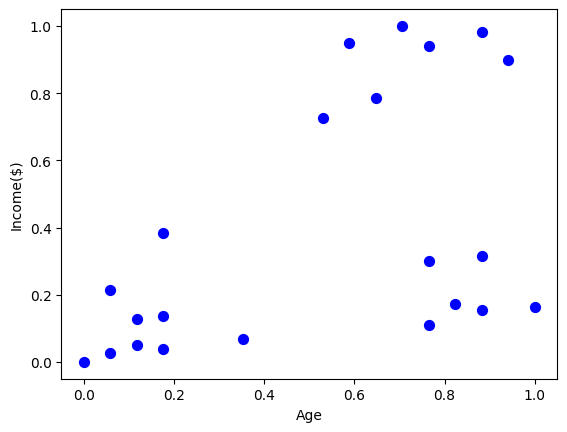

In [4]:
import matplotlib.pyplot as plt
## %matplotlib inline
plt.scatter(df.Age,df['Income($)'],s=50,c='b')
plt.xlabel('Age')
plt.ylabel('Income($)')

In [22]:
from scipy.spatial import distance
import numpy as np
import random
def euclidean_dist(x,y):
    return distance.euclidean(x,y)
def initialize_centroids(data,k):
    centroids_idx= np.random.choice(data.shape[0],k,replace=False)
    centroids=data.loc[centroids_idx].values
    return centroids[:k]
def closest_centroid(point, centroids):
    distances=[euclidean_dist(point,centroid) for centroid in centroids]
    return np.argmin(distances)
def move_centroids(data, centroids, labels):
    new_centroids=[]
    label=np.array(labels)
    for i in range(len(centroids)):
        label_index=np.where(label==i)[0]
        points=data.loc[label_index].values
        update_centroid=[sum(x)/len(points) for x in zip(*points)]
        new_centroids.append(update_centroid)
    return new_centroids
def k_means_clustering(data, k, max_iterations=1000):
    centroids= initialize_centroids(data,k)
    centroid_list=[]
    centroid_list.append(centroids)
    for _ in range(max_iterations):
        labels=[closest_centroid(data.loc[index].values, centroids) for index in data.index]
        centroids=move_centroids(data, centroids, labels)
        centroid_list.append(centroids)
    return centroids, labels, centroid_list
def error_k_mean(data, cenrtroids, labels):
    sse=[]
    label=np.array(labels)
    for i in range(len(centroids)):
        label_index=np.where(label==i)[0]
        points=data.loc[label_index].values
        error=[euclidean_distance(point, centroids[i]) for point in points]
        sse.append(np.array(error).sum())
    return np.array(sse).sum()

Text(0, 0.5, 'Income($)')

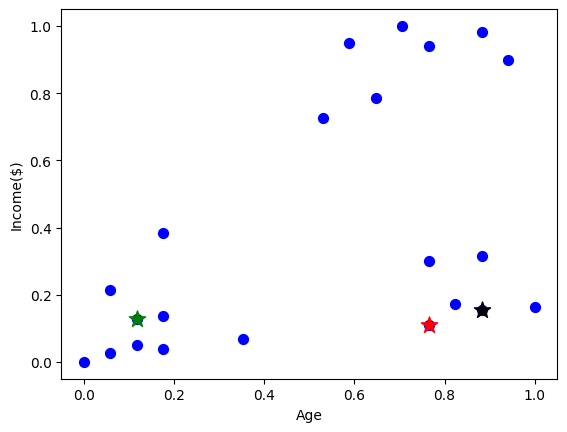

In [25]:
plt.scatter(df.Age, df['Income($)'], s=50, c='b')
plt.scatter(centroid_list[0][0][0], centroid_list[0][0][1], marker='*' , s=150, color='green')
plt.scatter(centroid_list[0][1][0], centroid_list[0][1][1], marker='*' , s=150, color='red')
plt.scatter(centroid_list[0][2][0], centroid_list[0][2][1], marker='*' , s=150, color='black')
plt.xlabel('Age')
plt.ylabel('Income($)')

Centroid_list: [array([[0.35294118, 0.06837607],
       [0.88235294, 0.98290598],
       [0.76470588, 0.11111111]]), [[0.13725490196078435, 0.11633428300094967], [0.7226890756302521, 0.8974358974358976], [0.8529411764705883, 0.2022792022792023]], [[0.13725490196078435, 0.11633428300094967], [0.7226890756302521, 0.8974358974358976], [0.8529411764705883, 0.2022792022792023]], [[0.13725490196078435, 0.11633428300094967], [0.7226890756302521, 0.8974358974358976], [0.8529411764705883, 0.2022792022792023]], [[0.13725490196078435, 0.11633428300094967], [0.7226890756302521, 0.8974358974358976], [0.8529411764705883, 0.2022792022792023]]]
final labels: [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2]
final centroids: [[0.13725490196078435, 0.11633428300094967], [0.7226890756302521, 0.8974358974358976], [0.8529411764705883, 0.2022792022792023]]


,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


Text(0, 0.5, 'Income($)')

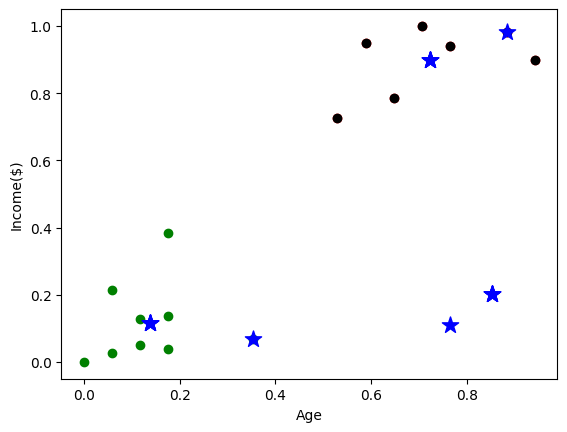

In [26]:
X=df[['Age','Income($)']]

centroids,labels,centroid_list=k_means_clustering(X,3)
print('Centroid_list:', centroid_list[:5])
print('final labels:',labels)
print('final centroids:', centroids)

df['cluster']=labels
display(df.head())

df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green', label='cluster 0')
plt.scatter(df2.Age,df2['Income($)'],color='red', label='cluster 1')
plt.scatter(df2.Age,df2['Income($)'],color='black', label='cluster 2')
for sublist in centroid_list[:5]:
    x_values=[point[0] for point in sublist]
    y_values=[point[1] for point in sublist]
    plt.scatter(x_values, y_values, marker='*', s=150, color='blue')
plt.xlabel('Age')
plt.ylabel('Income($)')




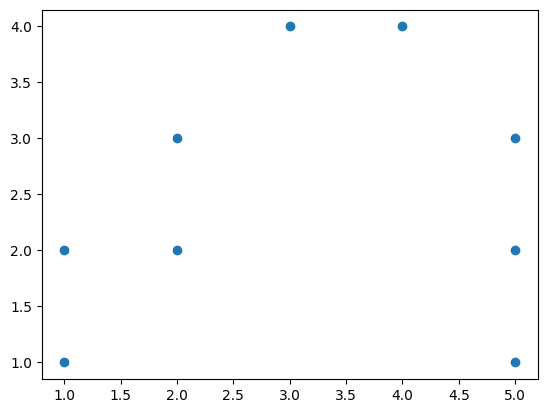

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
X=np.array([[1,1] ,[1,2] ,[2,2] ,[2,3] ,[3,4] ,[4,4] ,[5,1] ,[5,2] ,[5,3]])
plt.scatter(X[:,0],X[:,1])
plt.show()

In [22]:
k=2
clusters=[]
for idx in range(k):
    center=np.random.random((X.shape[1],))
    points=[]
    cluster={'center':center, 'points':[]}
    cl

array([0.92785982, 0.60952863])

In [11]:
X, y = make_blobs(n_samples=10, centers=3, n_features=2,         random_state=0)

In [8]:
X

array([[ 1.12031365,  5.75806083],
       [ 1.7373078 ,  4.42546234],
       [ 2.36833522,  0.04356792],
       [ 0.87305123,  4.71438583],
       [-0.66246781,  2.17571724],
       [ 0.74285061,  1.46351659],
       [-4.07989383,  3.57150086],
       [ 3.54934659,  0.6925054 ],
       [ 2.49913075,  1.23133799],
       [ 1.9263585 ,  4.15243012]])

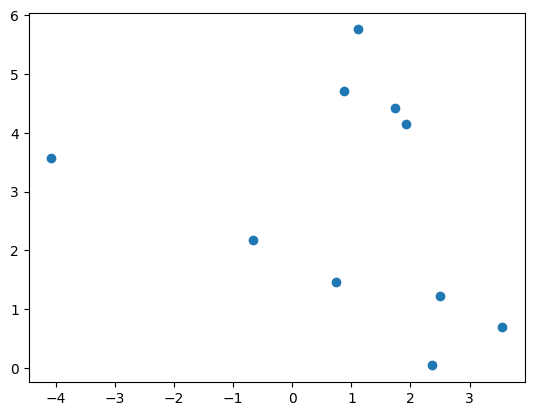

In [12]:
plt.scatter(X[:,0],X[:,1])

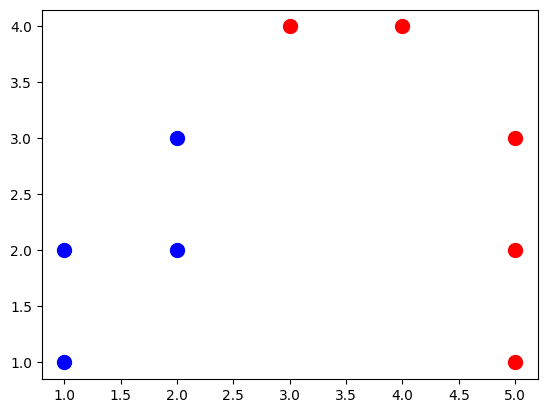

In [32]:
X=np.array([[1,1] ,[1,2] ,[2,2] ,[2,3] ,[3,4] ,[4,4] ,[5,1] ,[5,2] ,[5,3]])
from sklearn.cluster import KMeans
l=[]
for i in range(1,3):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=7)
    y_predict=kmeans.fit_predict(X)
    l.append(kmeans.inertia_)
plt.scatter(X[y_predict==0,0], X[y_predict==0,1],s=100,c='blue', label='Cluster1')
plt.scatter(X[y_predict==1,0], X[y_predict==1,1],s=100,c='red', label='Cluster2')

plt.show()